# Implementing a Multilayer Perceptron (MNIST)

## 1) Installing Libraries

In [1]:
# !conda install numpy pandas matplotlib --yes

In [2]:
# !pip install torch torchvision torchaudio

In [3]:
# !conda install watermark

In [4]:
# %load_ext watermark
# %watermark -v -p numpy,pandas,matplotlib,torch

## 2) Loading the dataset

- MNIST website: http://yann.lecun.com/exdb/mnist/

In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist\MNIST\raw\train-images-idx3-ubyte.gz to ./mnist\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist\MNIST\raw\train-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist\MNIST\raw\t10k-images-idx3-ubyte.gz to ./mnist\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./mnist\MNIST\raw



In [6]:
len(train_dataset)

60000

In [7]:
len(test_dataset)

10000

### Create a validation set

In [8]:
import torch
from torch.utils.data.dataset import random_split

torch.manual_seed(1)
train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])

In [9]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

## Requirement:Changing the Number of Layers

In this exercise, we are toying around with the multilayer perceptron architecture from Unit 4.3.

This network had 40,785 parameters (see Quiz on how to calculate this number), and it achieved the following accuracy values:
- Train Acc 97.24%
- Val Acc 95.64%
- Test Acc 96.46%

Can you change the architecture to achieve the same (or better) performance with fewer parameters and only 1 hidden layer?

## 3) Implementing the model

In [10]:
#The previous model architecture
# import torch

# class PyTorchMLP(torch.nn.Module):
#     def __init__(self, num_features, num_classes):
#         super().__init__()

#         self.all_layers = torch.nn.Sequential(
#             # 1st hidden layer
#             torch.nn.Linear(num_features, 50),
#             torch.nn.ReLU(),
#             # 2nd hidden layer
#             torch.nn.Linear(50, 25),
#             torch.nn.ReLU(),
#             # output layer
#             torch.nn.Linear(25, num_classes),
#         )

#     def forward(self, x):
#         x = torch.flatten(x, start_dim=1)
#         logits = self.all_layers(x)
#         return logits

In [11]:
#New model architecture
import torch

class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 50),
            torch.nn.ReLU(),
            torch.nn.Linear(50, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

## 4) The training loop

In [12]:
def compute_accuracy(model, dataloader):

    model = model.eval()

    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [13]:
import torch.nn.functional as F

torch.manual_seed(1)
model = PyTorchMLP(num_features=784, num_classes=10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 10

loss_list = []
train_acc_list, val_acc_list = [], []
for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )
        loss_list.append(loss.item())

    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

Epoch: 001/010 | Batch 000/860 | Train Loss: 2.32
Epoch: 001/010 | Batch 250/860 | Train Loss: 0.69
Epoch: 001/010 | Batch 500/860 | Train Loss: 0.42
Epoch: 001/010 | Batch 750/860 | Train Loss: 0.39
Train Acc 90.73% | Val Acc 90.72%
Epoch: 002/010 | Batch 000/860 | Train Loss: 0.38
Epoch: 002/010 | Batch 250/860 | Train Loss: 0.21
Epoch: 002/010 | Batch 500/860 | Train Loss: 0.21
Epoch: 002/010 | Batch 750/860 | Train Loss: 0.30
Train Acc 92.17% | Val Acc 91.74%
Epoch: 003/010 | Batch 000/860 | Train Loss: 0.44
Epoch: 003/010 | Batch 250/860 | Train Loss: 0.31
Epoch: 003/010 | Batch 500/860 | Train Loss: 0.20
Epoch: 003/010 | Batch 750/860 | Train Loss: 0.22
Train Acc 93.32% | Val Acc 92.82%
Epoch: 004/010 | Batch 000/860 | Train Loss: 0.41
Epoch: 004/010 | Batch 250/860 | Train Loss: 0.08
Epoch: 004/010 | Batch 500/860 | Train Loss: 0.18
Epoch: 004/010 | Batch 750/860 | Train Loss: 0.27
Train Acc 93.80% | Val Acc 93.26%
Epoch: 005/010 | Batch 000/860 | Train Loss: 0.26
Epoch: 005/010

## 7) Evaluating the results

In [14]:
train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Train Acc {train_acc*100:.2f}%")
print(f"Val Acc {val_acc*100:.2f}%")
print(f"Test Acc {test_acc*100:.2f}%")

Train Acc 96.63%
Val Acc 95.36%
Test Acc 95.97%


With only 1 hidden layer, the accuracy is smaller

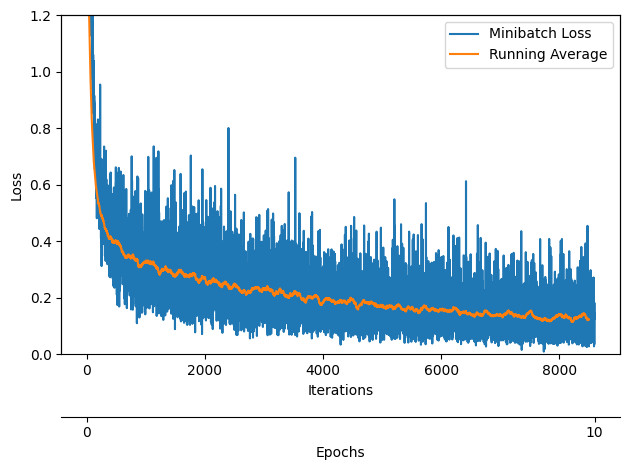

In [15]:
from helper_plotting import plot_training_loss

plot_training_loss(minibatch_loss_list=loss_list,
                   num_epochs=num_epochs,
                   iter_per_epoch=len(loss_list)//num_epochs)

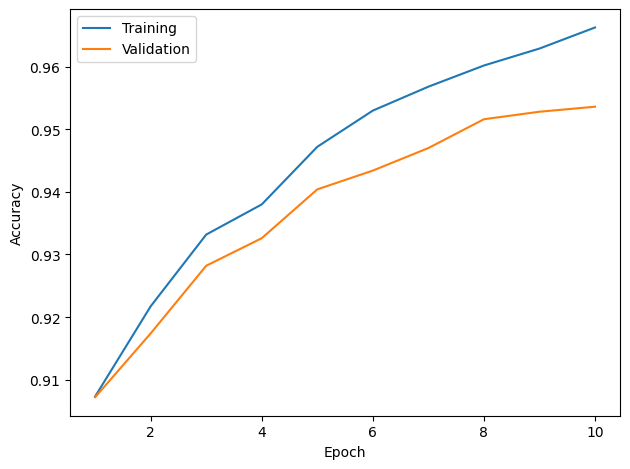

In [16]:
from helper_plotting import plot_accuracy

plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=val_acc_list)